In [1]:
#liên kết với gg drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv #thêm thư viện opencv
import numpy as np #thêm thư viện numpy
import os #lấy đường dẫn tới thư mục chứa hình ảnh
import matplotlib.pyplot as plt #thêm thư viện matplotlib

In [74]:
from keras.preprocessing import  image
from keras.preprocessing.image import load_img,img_to_array
#đưa đường dẫn vào thư viện hình ảnh đã được up lên gg drive
dir_folder = '/content/drive/MyDrive/bo'
#tạo list chứa data và label
labels = []
x_train = []
y_train = []
path_img=[]
# tạo dữ liệu train
for i in os.listdir(dir_folder):
  path = os.path.join(dir_folder, i)
  labels.append(str(i))
  for j in os.listdir(path):
    path_img.append(os.path.join(path,j))
    y_train.append(labels.index(i))
    img = image.load_img(os.path.join(path, j), target_size=(200,200))
    img = img_to_array(img)
    img = img.reshape(200,200,3) 
    img = img.astype('float32')
    img = img/255
    x_train.append(img)

In [75]:
x_train = np.array(x_train)
#chuyển list label thành dạng array 
y_train = np.array(y_train)

In [76]:
x_train.shape

(256, 200, 200, 3)

In [77]:
y_train.shape


(256,)

In [78]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

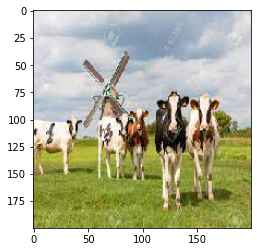

In [100]:
plt.imshow(x_train[170])

In [60]:
from tensorflow.keras.utils import to_categorical
y_train =to_categorical(y_train,6)

In [61]:
#xây dựng model cho việc training
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
model = Sequential()

model.add(Conv2D(filters=32,  kernel_size=(5,5), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200,200,3),strides=2))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(filters=64,  kernel_size=(5,5),  activation='relu', kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(filters=128,kernel_size=(5,5),  activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(512, activation='relu')) 
model.add(Dense(1028, activation='relu'))
model.add(Dense(1028, activation='relu'))

model.add(Dense(6, activation='softmax'))

model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 100, 100, 32)      2432      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 50, 50, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 50, 50, 64)        51264     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 25, 25, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 25, 25, 128)       204928    
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 12, 12, 128)     

In [62]:
#gọi hàm loss
from keras.backend import categorical_crossentropy
#gọi opimizer
from tensorflow.keras.optimizers import Adam,SGD

#opt= SGD(lr=0.01,momentum=0.9)
#sử dụng optimizer Adam
opt =Adam()
#cấu hình train
model.compile(opt,loss='categorical_crossentropy',metrics=['accuracy'])
#bỏ dữ liệu vô train
history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_split=(0.1), verbose=1)
#lưu model
model.save('bo.h5')

Epoch 1/100
4/4 [==============================] - 1s 117ms/step - loss: 8.1894 - accuracy: 0.1565 - val_loss: 1.8923 - val_accuracy: 0.0000e+00
Epoch 2/100
4/4 [==============================] - 0s 54ms/step - loss: 1.8008 - accuracy: 0.1913 - val_loss: 1.6591 - val_accuracy: 0.0000e+00
Epoch 3/100
4/4 [==============================] - 0s 49ms/step - loss: 1.7758 - accuracy: 0.2652 - val_loss: 1.7566 - val_accuracy: 0.0000e+00
Epoch 4/100
4/4 [==============================] - 0s 48ms/step - loss: 1.7029 - accuracy: 0.2783 - val_loss: 1.6573 - val_accuracy: 0.0000e+00
Epoch 5/100
4/4 [==============================] - 0s 46ms/step - loss: 1.6592 - accuracy: 0.2870 - val_loss: 1.7643 - val_accuracy: 0.2308
Epoch 6/100
4/4 [==============================] - 0s 48ms/step - loss: 1.6133 - accuracy: 0.4261 - val_loss: 1.6618 - val_accuracy: 0.0385
Epoch 7/100
4/4 [==============================] - 0s 47ms/step - loss: 1.4548 - accuracy: 0.4913 - val_loss: 1.3300 - val_accuracy: 0.5000
Epo

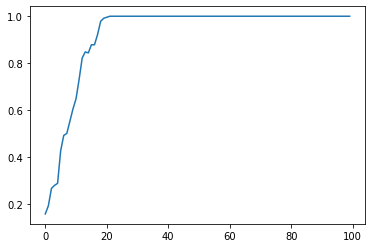

In [64]:
plt.plot(history.history['accuracy'])

In [101]:
label = ['1','4','0','3','5','2']

4


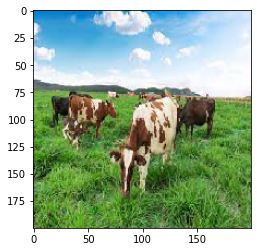

In [102]:
import numpy as np
from numpy import argmax
from keras.saving.save import load_model
#load model
model5= load_model('bo.h5')
from keras.preprocessing.image import load_img,img_to_array
#tạo dictionary

#load ảnh resize 50x50
img= load_img('test0.jpg',target_size=(200,200))
#show hình ảnh
plt.imshow(img)
img= img_to_array(img)
#img= cv.GaussianBlur(img,(505,505),0,0)
#reshape ảnh màu thành tensor 1x50x50x3
img= img.reshape(1,200,200,3)
img=img/255
#dự đoán kết quả
result= model5.predict(img)
print(label[int(np.argmax(result,axis=1))])

5


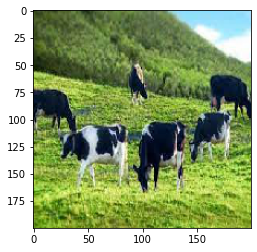

In [104]:
#load ảnh resize 50x50
img= load_img('test2.jpg',target_size=(200,200))
#show hình ảnh
plt.imshow(img)
img= img_to_array(img)
#img= cv.GaussianBlur(img,(505,505),0,0)
#reshape ảnh màu thành tensor 1x50x50x3
img= img.reshape(1,200,200,3)
img=img/255
#dự đoán kết quả
result= model5.predict(img)
print(label[int(np.argmax(result,axis=1))])

[[3.2134487e-08 9.9999988e-01 3.0411382e-08 4.2172801e-10 1.4882420e-07
  8.6743829e-10]]
4


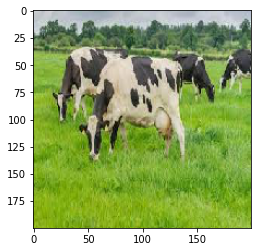

In [106]:
result= model5.predict(x_train[50].reshape(-1,200,200,3))
print(result)
plt.imshow(x_train[50])
print(label[int(np.argmax(result,axis=1))])

4


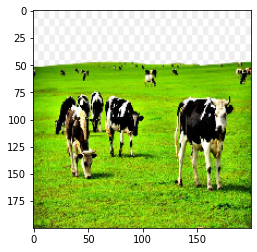

In [107]:
#load ảnh resize 50x50
img= load_img('test4.jpg',target_size=(200,200))
#show hình ảnh
plt.imshow(img)
img= img_to_array(img)
#img= cv.GaussianBlur(img,(505,505),0,0)
#reshape ảnh màu thành tensor 1x50x50x3
img= img.reshape(1,200,200,3)
img=img/255
#dự đoán kết quả
result= model5.predict(img)
print(label[int(np.argmax(result,axis=1))])

3


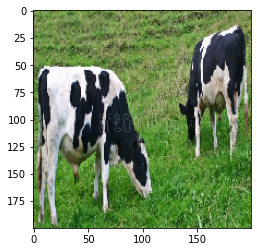

In [113]:
#load ảnh resize 50x50
img= load_img('test5.jpg',target_size=(200,200))
#show hình ảnh
plt.imshow(img)
img= img_to_array(img)
img= cv.GaussianBlur(img,(3,3),0,0)
#reshape ảnh màu thành tensor 1x50x50x3
img= img.reshape(1,200,200,3)
img=img/255
#dự đoán kết quả
result= model5.predict(img)
print(label[int(np.argmax(result,axis=1))])